In [16]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate
from sympy import Matrix, eye, symbols, simplify
from sympy.physics.quantum import TensorProduct
from sympy.printing import latex
from IPython.display import display, Math

In [ ]:
# Pauli matrices
Z = Matrix([[1, 0], [0, -1]])
I = eye(2)

# Z_i Z_j para 3 qubits
Z0Z1 = TensorProduct(Z, Z, I)
Z0Z2 = TensorProduct(Z, I, Z)
Z1Z2 = TensorProduct(I, Z, Z)

H_C = Z0Z1+Z0Z2+Z1Z2

display(Math(r"H_C=" + latex(H_C)))

# Symbolic gamma
gamma = symbols('gamma', real=True)

# # Exponentiate H_C
U_C_expr = simplify(((-eye(8) * gamma) * H_C).exp())

display(Math(r"U_C=" + latex(U_C_expr)))

# # Convert symbolic expression to numpy function
# gamma_val = np.pi / 3  # example value
# U_C_func = lambdify(gamma, U_C_expr, 'numpy')
# U_C_num = np.array(U_C_func(gamma_val)).astype(complex)

# # Build quantum circuit and apply U_C
# qc = QuantumCircuit(3)
# qc.h([0, 1, 2])  # Initial Hadamards

# # Add unitary from H_C
# gate = UnitaryGate(U_C_num, label="U_C")
# qc.append(gate, [0, 1, 2])

# qc.draw('mpl')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

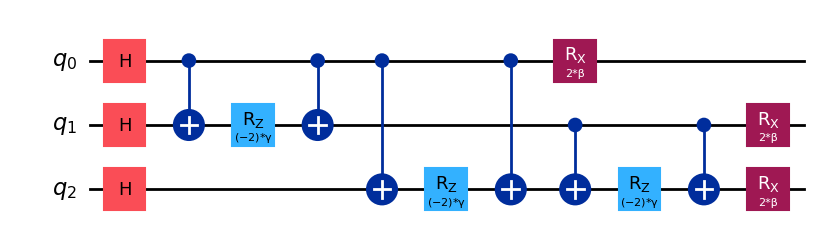

In [5]:
# Parameters
gamma = Parameter('γ')
beta = Parameter('β')

# Define graph K3 (complete graph with 3 nodes)
edges = [(0, 1), (0, 2), (1, 2)]

# Initialize quantum circuit
n_qubits = 3
qc = QuantumCircuit(n_qubits)

# Step 1: Initial state - Hadamards on all qubits
qc.h(range(n_qubits))

# Step 2: Apply U_C = exp(-i γ H_C)
for i, j in edges:
    # For each edge, apply: exp(-i γ (I - Z_i Z_j)/2)
    # Up to global phase, this becomes: exp(i γ Z_i Z_j)
    qc.cx(i, j)
    qc.rz(-2 * gamma, j)
    qc.cx(i, j)

# Step 3: Apply U_M = exp(-i β ∑ X_i) = Rx(2β) on each qubit
for i in range(n_qubits):
    qc.rx(2 * beta, i)

qc.draw('mpl')